**TensorFlow and Keras**: TensorFlow is a popular deep learning library, and Keras is its high-level API. We use these to build and train our CNN model.

**Matplotlib**: This is used for plotting graphs and visualizing data, such as accuracy and loss curves.

In [54]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



**MNIST Dataset**: MNIST is a dataset of 70,000 grayscale images of handwritten digits (0-9), where each image is 28x28 pixels.

**Loading Data** : The load_data() function loads the dataset into training and testing sets. x_train and x_test are the images, while y_train and y_test are the corresponding labels (the actual digit each image represents).

In [55]:
tf.keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [56]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()



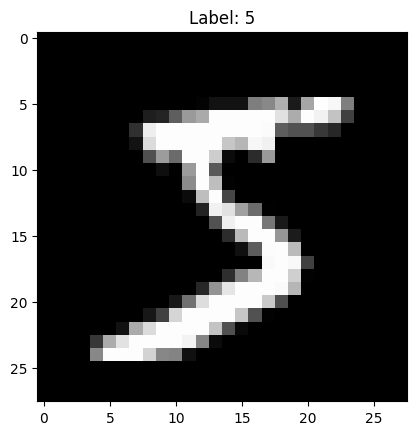

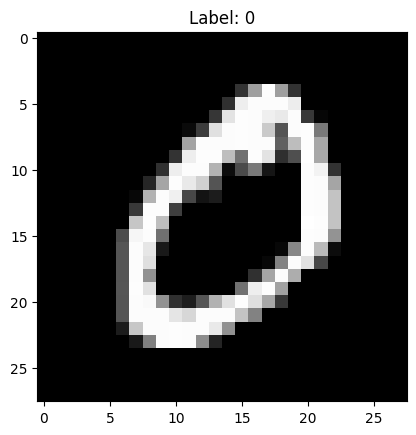

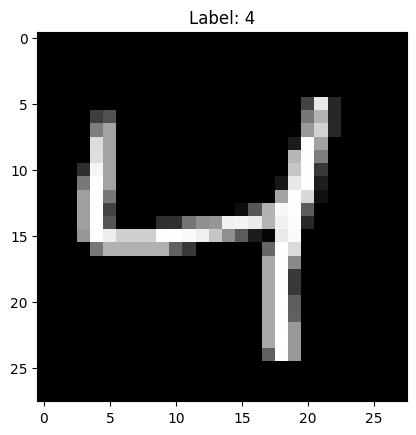

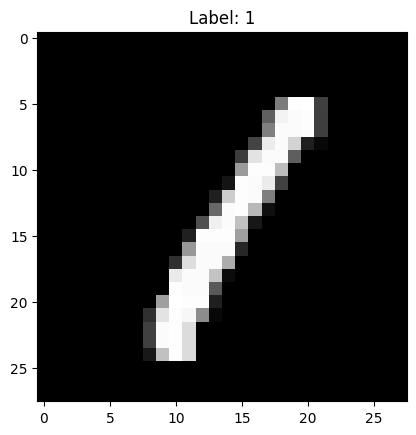

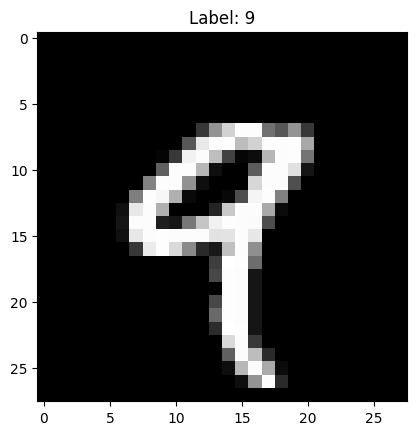

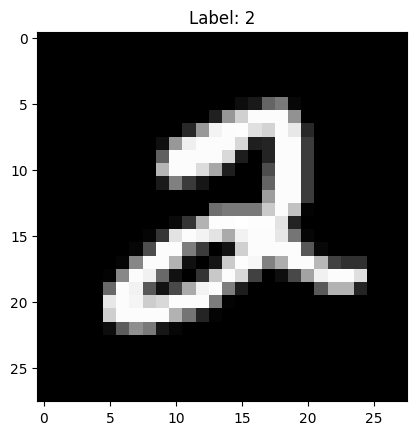

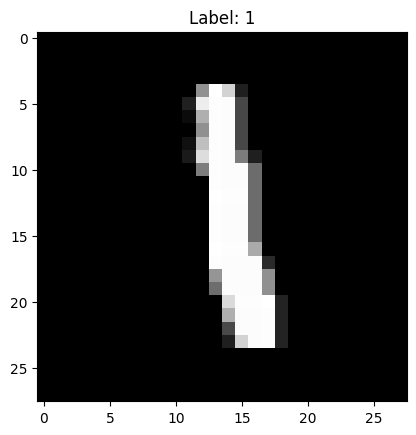

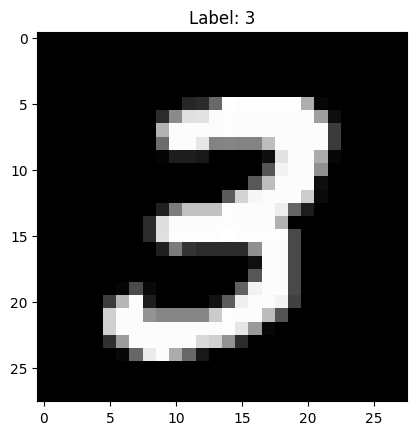

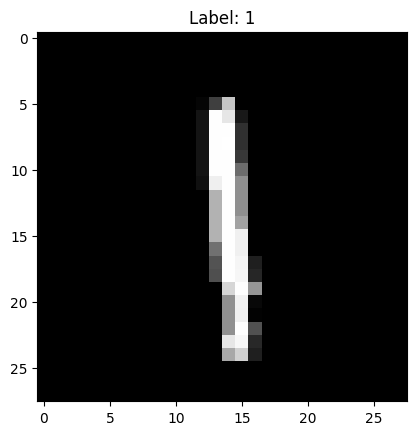

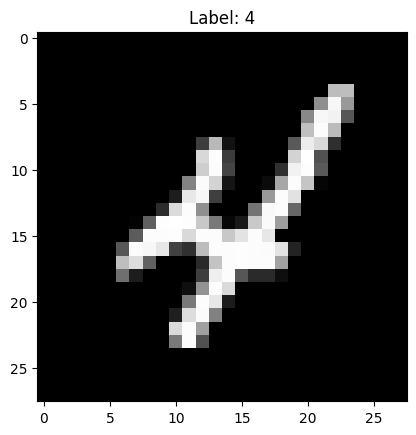

In [57]:


# Display the first 10 images and labels from the training set
for i in range(10):
    plt.imshow(x_train[i], cmap='gray')  # Display the i-th image
    plt.title("Label: " + str(y_train[i]))  # Display the corresponding label
    plt.show()                           # Show the image


**Normalization**: Pixel values in the images range from 0 to 255. We normalize them to a range of 0 to 1 by dividing by 255.0. This helps the model learn more effectively.

**astype('float32')**: Ensures the pixel values are treated as floating-point numbers, which is important for calculations during training.

In [58]:
# Normalize the images to values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



**Reshaping**: The images are originally 28x28, but we need to add a channel dimension to indicate they are grayscale (single channel). After reshaping, the images have the shape (28, 28, 1), where 1 is the channel dimension.

In [59]:
# Reshape the images to add the channel dimension (since they are grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))




**One-Hot Encoding**: The labels are integers (0-9). One-hot encoding transforms them into a binary matrix. For example, the label 3 becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This is necessary for the categorical cross-entropy loss function used during training.

In [60]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


**Sequential Model**: We use Sequential to build a linear stack of layers for the CNN.

**Conv2D Layer**: Applies 2D convolution over the input image. The first layer has 32 filters, each of size 3x3, and uses the ReLU activation function. This detects features such as edges.

*Input Shape* : The first layer's input shape is (28, 28, 1), corresponding to the image dimensions and channel.

**MaxPooling2D Layer** : Reduces the spatial dimensions (height and width) by taking the maximum value in a 2x2 window. This helps in reducing the computational complexity and overfitting.

**Flatten Layer**: Flattens the 2D output from the convolutional layers into a 1D vector, preparing it for the dense (fully connected) layers.

**Dense Layer**: A fully connected layer where each neuron is connected to all the neurons in the previous layer. The first dense layer has 64 units and uses the ReLU activation function.

**Output Layer**: The final dense layer has 10 units (one for each digit) and uses the softmax activation function, which outputs probabilities for each class.

In [61]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


**Compile Method:** Prepares the model for training by specifying the optimizer, loss function, and metrics.

**Optimizer**: Adam is an efficient variant of gradient descent that adjusts the learning rate during training.

**Loss Function**: categorical_crossentropy is used for multi-class classification problems. It compares the predicted probabilities to the true labels.

**Metrics**: accuracy is used to monitor the fraction of correct predictions.

In [62]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**fit Method**: Trains the model on the training data.
Epochs: The number of times the model will cycle through the entire training dataset. Here, we use 5 epochs.

**Validation Data**: x_test and y_test are used to validate the model's performance after each epoch. This helps monitor overfitting.

In [63]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.8948 - loss: 0.3391 - val_accuracy: 0.9870 - val_loss: 0.0402
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9847 - loss: 0.0457 - val_accuracy: 0.9856 - val_loss: 0.0414
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9908 - loss: 0.0292 - val_accuracy: 0.9911 - val_loss: 0.0270
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9927 - loss: 0.0226 - val_accuracy: 0.9907 - val_loss: 0.0288
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9945 - loss: 0.0175 - val_accuracy: 0.9902 - val_loss: 0.0346


**evaluate Method:** Evaluates the model on the test dataset, returning the loss and accuracy.

**Verbose**: Controls the verbosity of the output. verbose=2 provides more detailed output without showing progress bars.

Test Accuracy: The accuracy on the test data is printed, showing how well the model generalizes to unseen data.

In [64]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')


313/313 - 3s - 9ms/step - accuracy: 0.9902 - loss: 0.0346

Test accuracy: 0.9902


**History Object**: The history object returned by model.fit() contains the loss and accuracy values for each epoch during training.

**Plotting Accuracy**: We plot the training and validation accuracy over epochs to see how the model improves.

**Plotting Loss**: Similarly, we plot the loss to check if it decreases over time, indicating better model performance.

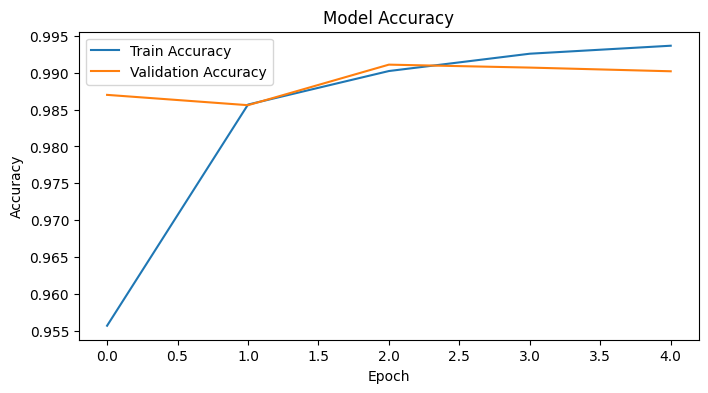

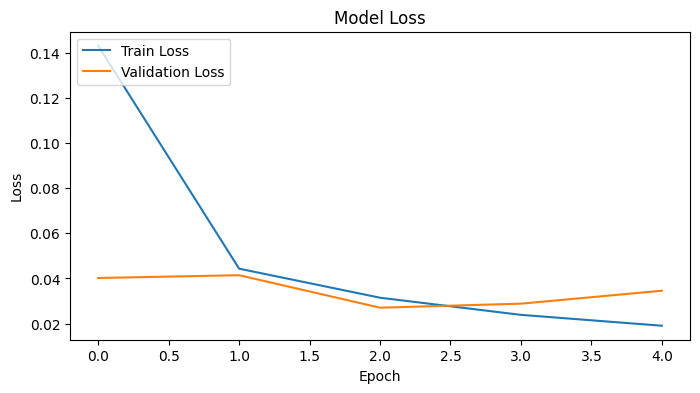

In [65]:
# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


**save the model**

In [69]:
# Save the model
model.save('model.h5')  # Save the model to a file named 'my_model.h5'


**test with unseen data**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


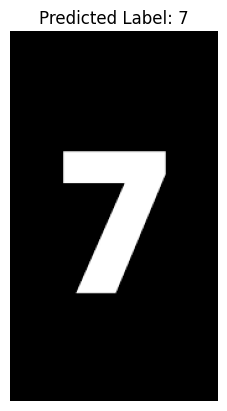

In [72]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model (replace 'model.h5' with your actual model file)
model = tf.keras.models.load_model('model.h5')

# Load and preprocess the new image
def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    img = img.resize((28, 28))  # Resize image to 28x28 pixels
    img_array = np.array(img)  # Convert image to numpy array
    img_array = img_array / 255.0  # Normalize the image
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for the model
    return img_array

# Path to the new image
image_path = '/content/7.png'
preprocessed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(preprocessed_image)
predicted_label = np.argmax(prediction, axis=1)

# Display the image and the prediction
img = Image.open(image_path)
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Label: {predicted_label[0]}")
plt.axis('off')
plt.show()
